Bài 1: Implementation mạng nơ-ron cơ bản cho bài toán nhận diện chữ cái

Bước 1 : Tạo tập dữ liệu bằng mảng Numpy gồm các sô 0 và 1.

    Tạo tập dữ liệu (dataset) bằng mảng NumPy gồm các số 0 và 1. Các mảng này đại diện cho hình ảnh pixel đơn giản của chữ cái A, B, C (kích thước 5x6).

In [15]:
# Creating data set
# A
a =[0, 0, 1, 1, 0, 0,
0, 1, 0, 0, 1, 0,
1, 1, 1, 1, 1, 1,
1, 0, 0, 0, 0, 1,
1, 0, 0, 0, 0, 1]
# B
b =[0, 1, 1, 1, 1, 0,
0, 1, 0, 0, 1, 0,
0, 1, 1, 1, 1, 0,
0, 1, 0, 0, 1, 0,
0, 1, 1, 1, 1, 0]
# C
c =[0, 1, 1, 1, 1, 0,
0, 1, 0, 0, 0, 0,
0, 1, 0, 0, 0, 0,
0, 1, 0, 0, 0, 0,
0, 1, 1, 1, 1, 0]
# Creating labels
y =[[1, 0, 0],
[0, 1, 0],
[0, 0, 1]]

Bước 2: Hiển thị tập dữ liệu

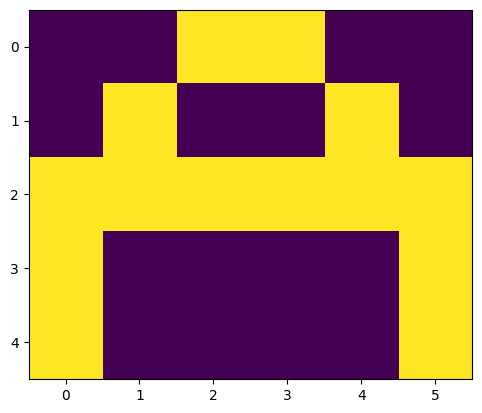

In [16]:
import numpy as np
import matplotlib.pyplot as plt
# visualizing the data, plotting A.
plt.imshow(np.array(a).reshape(5, 6))
plt.show()

Bước 3: Vì tập dữ liệu ở dạng danh sách nên chúng ta sẽ chuyển đổi nó thành mảng numpy.

In [17]:
# converting data and labels into numpy array
x =[np.array(a).reshape(1, 30), np.array(b).reshape(1, 30),
np.array(c).reshape(1, 30)]
y = np.array(y)
# Printing data and labels
print(x, "\n\n", y)

[array([[0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
        0, 1, 1, 0, 0, 0, 0, 1]]), array([[0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0,
        1, 0, 0, 1, 1, 1, 1, 0]]), array([[0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 1, 1, 1, 1, 0]])] 

 [[1 0 0]
 [0 1 0]
 [0 0 1]]


Bước 4: Xác định các hàm mạng nơ-ron.

In [18]:
# activation function
def sigmoid(x):
    return(1/(1 + np.exp(-x)))
# Creating the Feed forward neural network
def f_forward(x, w1, w2):
# hidden
    z1 = x.dot(w1) # input from layer 1
    a1 = sigmoid(z1) # out put of layer 2
    z2 = a1.dot(w2) # input of out layer
    a2 = sigmoid(z2) # output of out layer
    return(a2)
# initializing the weights randomly
def generate_wt(x, y):
    li =[]
    for i in range(x * y):  
        li.append(np.random.randn())
    return(np.array(li).reshape(x, y))
# for loss we will be using mean square error(MSE)
def loss(out, Y):
    s =(np.square(out-Y))
    s = np.sum(s)/len(y)
    return(s)
# Back propagation of error
def back_prop(x, y, w1, w2, alpha):
# hidden layer
    z1 = x.dot(w1)
    a1 = sigmoid(z1)
    z2 = a1.dot(w2)
    a2 = sigmoid(z2)
# error in output layer
    d2 =(a2-y)
    d1 = np.multiply((w2.dot((d2.transpose()))).transpose(),
    (np.multiply(a1, 1-a1)))
# Gradient for w1 and w2
    w1_adj = x.transpose().dot(d1)
    w2_adj = a1.transpose().dot(d2)
# Updating parameters
    w1 = w1-(alpha*(w1_adj))
    w2 = w2-(alpha*(w2_adj))
    return(w1, w2)

Bước 5: Khởi tạo trọng số

In [19]:
w1 = generate_wt(30, 5)
w2 = generate_wt(5, 3)
print(w1, "\n\n", w2)

[[-5.75689314e-01  8.92189038e-01  3.23481177e-01 -1.65534767e+00
   6.47306694e-01]
 [-1.00997019e+00  5.13215426e-02 -2.63149646e-01 -7.74291317e-01
  -1.26398584e+00]
 [ 8.58877143e-01  6.50782330e-01  1.67097267e+00 -9.65862646e-01
  -6.81238347e-02]
 [ 1.19782008e-01 -7.20211292e-01 -1.20667383e+00 -2.89761316e-01
   1.86145370e-01]
 [-9.21379183e-01  7.25222287e-02 -4.29735165e-01 -9.55814772e-01
   2.95655758e-01]
 [ 1.11901839e+00 -4.93811498e-01  4.21094268e-01  5.33021588e-01
  -1.87397554e+00]
 [ 2.40018588e-01 -3.05627802e-01 -2.43662032e+00  3.23796082e-01
   2.35110628e-05]
 [-6.38611905e-01  1.22656019e+00  1.61441984e-01  7.72869818e-01
  -5.05903453e-01]
 [-5.47533778e-01 -1.52125036e-01 -1.69585818e+00  1.34507490e+00
   2.50095375e+00]
 [ 1.28622212e+00 -1.63330634e+00 -1.10995365e+00  8.80009359e-01
   6.71720108e-01]
 [ 4.54802781e-01 -8.08139351e-01 -9.80255815e-01 -1.15605192e-01
  -1.39260274e+00]
 [ 7.36851146e-01 -2.62820149e+00 -5.43310643e-01 -5.29232655e-01

Bước 6: Huấn luyện mô hình

In [20]:
def train(x, Y, w1, w2, alpha = 0.01, epoch = 10):
    acc =[]
    losss =[]
    for j in range(epoch):
        l =[]
        for i in range(len(x)):
            out = f_forward(x[i], w1, w2)
            l.append((loss(out, Y[i])))
            w1, w2 = back_prop(x[i], y[i], w1, w2, alpha)
        print("epochs:", j + 1, "======== acc:", (1-(sum(l)/len(x)))*100)
        acc.append((1-(sum(l)/len(x)))*100)
        losss.append(sum(l)/len(x))
    return(acc, losss, w1, w2)
acc, losss, w1, w2 = train(x, y, w1, w2, 0.1, 100)

epochs: 1 ======== acc: 76.28220274587724
epochs: 2 ======== acc: 77.61154253686357
epochs: 3 ======== acc: 78.73800079145852
epochs: 4 ======== acc: 79.695143796168
epochs: 5 ======== acc: 80.5286752947472
epochs: 6 ======== acc: 81.2744234276931
epochs: 7 ======== acc: 81.95531007386748
epochs: 8 ======== acc: 82.58450760470956
epochs: 9 ======== acc: 83.16939687195081
epochs: 10 ======== acc: 83.71451775294945
epochs: 11 ======== acc: 84.22328235510707
epochs: 12 ======== acc: 84.69876800187716
epochs: 13 ======== acc: 85.14397928641307
epochs: 14 ======== acc: 85.56186644934388
epochs: 15 ======== acc: 85.95526331362
epochs: 16 ======== acc: 86.32681922743916
epochs: 17 ======== acc: 86.67895063109457
epochs: 18 ======== acc: 87.01381599578501
epochs: 19 ======== acc: 87.33331017247895
epochs: 20 ======== acc: 87.63907263926183
epochs: 21 ======== acc: 87.93250476172392
epochs: 22 ======== acc: 88.21479230381571
epochs: 23 ======== acc: 88.48693046006566
epochs: 24 ======== acc: 88

Bước 7: Vẽ đồ thị Accuracy (đọ chính xác) và Loss (mất mát) 

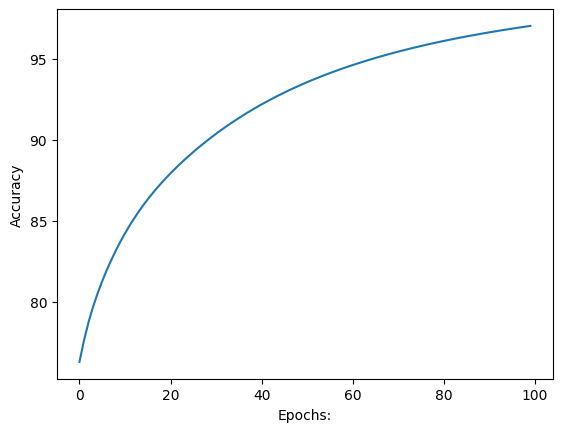

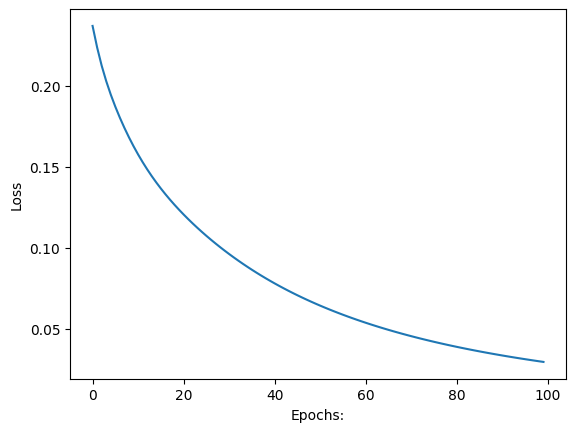

In [21]:
import matplotlib.pyplot as plt1
# plotting accuracy
plt1.plot(acc)
plt1.ylabel('Accuracy')
plt1.xlabel("Epochs:")
plt1.show()
# plotting Loss
plt1.plot(losss)
plt1.ylabel('Loss')
plt1.xlabel("Epochs:")
plt1.show()

Bước 8: Đưa ra dự đoán

Image is of letter B.


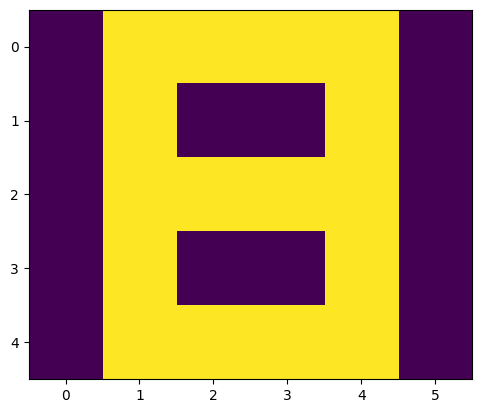

In [22]:
def predict(x, w1, w2):
    Out = f_forward(x, w1, w2)
    maxm = 0
    k = 0
    for i in range(len(Out[0])):
        if(maxm<Out[0][i]):
            maxm = Out[0][i]
            k = i
    if(k == 0):
        print("Image is of letter A.")
    elif(k == 1):
        print("Image is of letter B.")
    else:
        print("Image is of letter C.")
    plt.imshow(x.reshape(5, 6))
    plt.show()
# Example: Predicting for letter 'B'
predict(x[1], w1, w2)

Output

    Hình ảnh (PNG): Dùng matplotlib.pyplot.imshow để vẽ lưới pixel 5x6 (chữ A ở bước 2, chữ B ở bước 8). Hình ảnh là bitmap đơn giản, thể hiện chữ cái rõ ràng.
    
    Biểu đồ (PNG): Dùng matplotlib.pyplot.plot để vẽ hai biểu đồ đường (accuracy và loss) trong bước 7, giúp theo dõi quá trình học của mô hình.